# Machine Learning Foundation

## Keras Intro

### Using Keras to build and train neural network

### Attributes: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [1]:
# set up
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve,roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
## Import Keras objects for Deep Learning
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam,SGD,RMSprop

In [4]:
## Load in th data set
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]

diabetes_df=pd.read_csv('data/diabetes.csv', names=names,header=0)
diabetes_df.head()

,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_df.shape

(768, 9)

In [10]:
X=diabetes_df.iloc[:,:-1].values
y=diabetes_df['has_diabetes'].values

In [11]:
# Split the data into train and test(75% and 25%)
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size=0.25,
                                                 random_state=11111)

In [13]:
np.mean(y)

0.3489583333333333

There is about 35% of the patients in this dataset have diabetes, while 65% do not.

### Get baseline performance using Random Forest

In [14]:
## Train rf model
rf_model =RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [17]:
## Make prediction on the test set
## both "hard" prediction and the scores
## (percent of trees voting yes)
y_pred_class_rf=rf_model.predict(X_test)
y_pred_prob_rf=rf_model.predict_proba(X_test)

print("accuracy is {:.3f}".format(accuracy_score(y_test, y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.776
roc-auc is 0.824


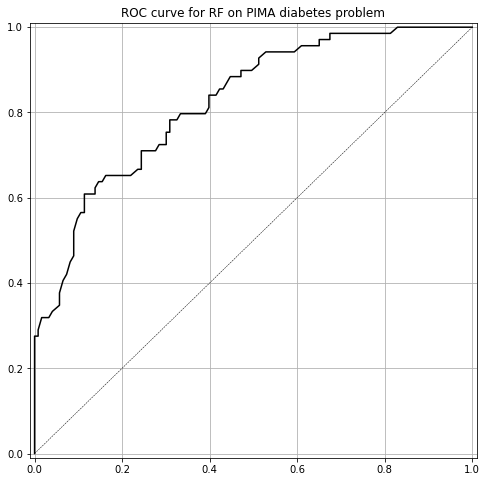

In [19]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr=roc_curve(y_test, y_pred)
    fig, ax=plt.subplots(figsize=(8,8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0,1], [0,1], 'k--', linewidth=.5)
    ax.grid(True)
    ax.set(title='ROC curve for {} on PIMA diabetes problem'.format(model_name),
          xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

plot_roc(y_test, y_pred_prob_rf[:,1], 'RF')

### Build a single hidden layer neural network

We will use the Sequential model to quickly build a neural network.  Our first network will be a single layer network.  We have 8 variables, so we set the input shape to 8.  Let's start by having a single hidden layer with 12 nodes.

In [30]:
## we normalize the data first
## it will aid the numerical stability

normalizer=StandardScaler()
X_train_norm=normalizer.fit_transform(X_train)
X_test_norm=normalizer.transform(X_test)

In [22]:
## define model
## input size is 8dimensional
## 1 hidden layer , 12 hidden nodes sigmoid activation
## final layer has one node with a sigmoid activation

model_1=Sequential()
model_1.add(Dense(12, input_shape=(8,), activation='sigmoid'))
model_1.add(Dense(1, activation='sigmoid'))

In [23]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [31]:
## Fit the model
model_1.compile(SGD(lr=.003), "binary_crossentropy", 
                 metrics=["accuracy"])
run_hist_1=model_1.fit(X_train_norm, y_train, 
                       validation_data=(X_test_norm, y_test),
                      epochs=200)

Epoch 1/200
18/18 [==============================] - 0s 6ms/step - loss: 0.7109 - accuracy: 0.6545 - val_loss: 0.7213 - val_accuracy: 0.6406
Epoch 2/200
18/18 [==============================] - 0s 1ms/step - loss: 0.7065 - accuracy: 0.6545 - val_loss: 0.7166 - val_accuracy: 0.6406
Epoch 3/200
18/18 [==============================] - 0s 1ms/step - loss: 0.7025 - accuracy: 0.6545 - val_loss: 0.7123 - val_accuracy: 0.6406
Epoch 4/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6988 - accuracy: 0.6545 - val_loss: 0.7082 - val_accuracy: 0.6406
Epoch 5/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.6545 - val_loss: 0.7043 - val_accuracy: 0.6406
Epoch 6/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.6545 - val_loss: 0.7008 - val_accuracy: 0.6406
Epoch 7/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.6545 - val_loss: 0.6974 - val_accuracy: 0.6406
Epoch 8/200
1

Epoch 59/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6342 - accuracy: 0.6528 - val_loss: 0.6369 - val_accuracy: 0.6406
Epoch 60/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6337 - accuracy: 0.6528 - val_loss: 0.6363 - val_accuracy: 0.6406
Epoch 61/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6528 - val_loss: 0.6358 - val_accuracy: 0.6406
Epoch 62/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6326 - accuracy: 0.6528 - val_loss: 0.6352 - val_accuracy: 0.6406
Epoch 63/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6320 - accuracy: 0.6528 - val_loss: 0.6347 - val_accuracy: 0.6406
Epoch 64/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6316 - accuracy: 0.6528 - val_loss: 0.6341 - val_accuracy: 0.6406
Epoch 65/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6310 - accuracy: 0.6528 - val_loss: 0.6336 - val_accuracy: 0.6406
Epoch 

18/18 [==============================] - 0s 1ms/step - loss: 0.6058 - accuracy: 0.6580 - val_loss: 0.6089 - val_accuracy: 0.6458
Epoch 117/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6054 - accuracy: 0.6580 - val_loss: 0.6085 - val_accuracy: 0.6458
Epoch 118/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6049 - accuracy: 0.6562 - val_loss: 0.6080 - val_accuracy: 0.6458
Epoch 119/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6044 - accuracy: 0.6580 - val_loss: 0.6076 - val_accuracy: 0.6406
Epoch 120/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6039 - accuracy: 0.6597 - val_loss: 0.6071 - val_accuracy: 0.6406
Epoch 121/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6035 - accuracy: 0.6597 - val_loss: 0.6067 - val_accuracy: 0.6406
Epoch 122/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6030 - accuracy: 0.6597 - val_loss: 0.6062 - val_accuracy: 0.6406
Epoch 123/200

18/18 [==============================] - 0s 1ms/step - loss: 0.5805 - accuracy: 0.6806 - val_loss: 0.5846 - val_accuracy: 0.6875
Epoch 174/200
18/18 [==============================] - 0s 1ms/step - loss: 0.5801 - accuracy: 0.6823 - val_loss: 0.5842 - val_accuracy: 0.6875
Epoch 175/200
18/18 [==============================] - 0s 1ms/step - loss: 0.5797 - accuracy: 0.6806 - val_loss: 0.5838 - val_accuracy: 0.6927
Epoch 176/200
18/18 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.6788 - val_loss: 0.5834 - val_accuracy: 0.6927
Epoch 177/200
18/18 [==============================] - 0s 1ms/step - loss: 0.5789 - accuracy: 0.6823 - val_loss: 0.5830 - val_accuracy: 0.6927
Epoch 178/200
18/18 [==============================] - 0s 1ms/step - loss: 0.5785 - accuracy: 0.6823 - val_loss: 0.5826 - val_accuracy: 0.6927
Epoch 179/200
18/18 [==============================] - 0s 1ms/step - loss: 0.5780 - accuracy: 0.6823 - val_loss: 0.5822 - val_accuracy: 0.6927
Epoch 180/200

In [32]:
## Like we did for the Random Forest, we generate two kinds of prediction
## One is hard prediction
## the other is a probabilstic score

y_pred_class_nn_1=model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1=model_1.predict(X_test_norm)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [33]:
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [34]:
y_pred_prob_nn_1[:10]

array([[0.37275234],
       [0.5064256 ],
       [0.340949  ],
       [0.3692815 ],
       [0.27821034],
       [0.4220354 ],
       [0.23324189],
       [0.38173282],
       [0.4826442 ],
       [0.3890062 ]], dtype=float32)

accuracy is 0.714
roc-auc is 0.792


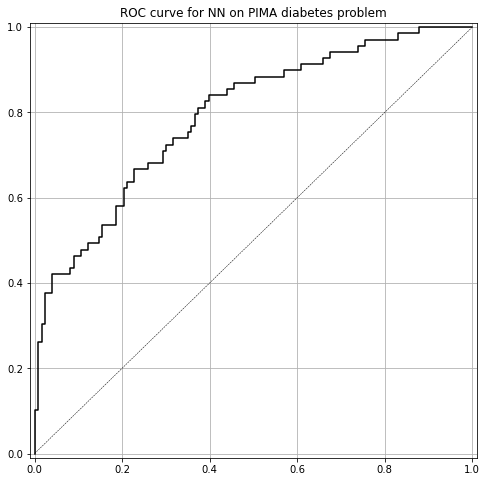

In [35]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

In [36]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

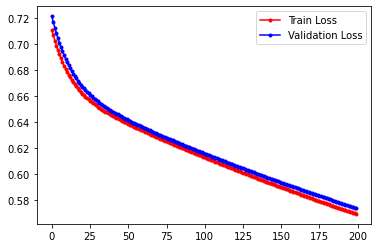

In [37]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [38]:
## we call "fit" again
run_hist_1b = model_1.fit(X_train_norm, y_train, 
                          validation_data=(X_test_norm, y_test), 
                          epochs=1000)

Epoch 1/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.6910 - val_loss: 0.5737 - val_accuracy: 0.7135
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5687 - accuracy: 0.6910 - val_loss: 0.5733 - val_accuracy: 0.7135
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5684 - accuracy: 0.6927 - val_loss: 0.5729 - val_accuracy: 0.7135
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5680 - accuracy: 0.6927 - val_loss: 0.5726 - val_accuracy: 0.7188
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5676 - accuracy: 0.6927 - val_loss: 0.5722 - val_accuracy: 0.7188
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5672 - accuracy: 0.6927 - val_loss: 0.5718 - val_accuracy: 0.7240
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5668 - accuracy: 0.6927 - val_loss: 0.5714 - val_accuracy: 0.7240
Epoch 

18/18 [==============================] - 0s 1ms/step - loss: 0.5482 - accuracy: 0.7153 - val_loss: 0.5538 - val_accuracy: 0.7344
Epoch 59/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5478 - accuracy: 0.7188 - val_loss: 0.5535 - val_accuracy: 0.7396
Epoch 60/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5475 - accuracy: 0.7188 - val_loss: 0.5532 - val_accuracy: 0.7396
Epoch 61/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5472 - accuracy: 0.7188 - val_loss: 0.5529 - val_accuracy: 0.7448
Epoch 62/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5468 - accuracy: 0.7188 - val_loss: 0.5526 - val_accuracy: 0.7448
Epoch 63/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5465 - accuracy: 0.7205 - val_loss: 0.5523 - val_accuracy: 0.7448
Epoch 64/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5462 - accuracy: 0.7205 - val_loss: 0.5519 - val_accuracy: 0.7448
Epoch 65/1000

18/18 [==============================] - 0s 1ms/step - loss: 0.5305 - accuracy: 0.7361 - val_loss: 0.5374 - val_accuracy: 0.7500
Epoch 116/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5302 - accuracy: 0.7361 - val_loss: 0.5371 - val_accuracy: 0.7500
Epoch 117/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5299 - accuracy: 0.7361 - val_loss: 0.5368 - val_accuracy: 0.7500
Epoch 118/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5296 - accuracy: 0.7361 - val_loss: 0.5366 - val_accuracy: 0.7552
Epoch 119/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5293 - accuracy: 0.7326 - val_loss: 0.5363 - val_accuracy: 0.7552
Epoch 120/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5291 - accuracy: 0.7326 - val_loss: 0.5361 - val_accuracy: 0.7552
Epoch 121/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5288 - accuracy: 0.7326 - val_loss: 0.5358 - val_accuracy: 0.7552
Epoch 1

Epoch 172/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5160 - accuracy: 0.7483 - val_loss: 0.5242 - val_accuracy: 0.7656
Epoch 173/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5157 - accuracy: 0.7483 - val_loss: 0.5240 - val_accuracy: 0.7656
Epoch 174/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.7500 - val_loss: 0.5238 - val_accuracy: 0.7656
Epoch 175/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5153 - accuracy: 0.7500 - val_loss: 0.5236 - val_accuracy: 0.7656
Epoch 176/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5151 - accuracy: 0.7500 - val_loss: 0.5234 - val_accuracy: 0.7656
Epoch 177/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5149 - accuracy: 0.7517 - val_loss: 0.5232 - val_accuracy: 0.7656
Epoch 178/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5146 - accuracy: 0.7517 - val_loss: 0.5230 - val_accuracy:

Epoch 229/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5043 - accuracy: 0.7604 - val_loss: 0.5140 - val_accuracy: 0.7760
Epoch 230/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5041 - accuracy: 0.7604 - val_loss: 0.5138 - val_accuracy: 0.7760
Epoch 231/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5040 - accuracy: 0.7604 - val_loss: 0.5137 - val_accuracy: 0.7708
Epoch 232/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5038 - accuracy: 0.7604 - val_loss: 0.5135 - val_accuracy: 0.7708
Epoch 233/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5036 - accuracy: 0.7639 - val_loss: 0.5134 - val_accuracy: 0.7708
Epoch 234/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.7622 - val_loss: 0.5132 - val_accuracy: 0.7708
Epoch 235/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5033 - accuracy: 0.7622 - val_loss: 0.5131 - val_accuracy:

Epoch 286/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4951 - accuracy: 0.7656 - val_loss: 0.5062 - val_accuracy: 0.7656
Epoch 287/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4949 - accuracy: 0.7674 - val_loss: 0.5061 - val_accuracy: 0.7708
Epoch 288/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.7674 - val_loss: 0.5060 - val_accuracy: 0.7708
Epoch 289/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.7674 - val_loss: 0.5059 - val_accuracy: 0.7708
Epoch 290/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4945 - accuracy: 0.7674 - val_loss: 0.5058 - val_accuracy: 0.7708
Epoch 291/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4944 - accuracy: 0.7674 - val_loss: 0.5056 - val_accuracy: 0.7708
Epoch 292/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4942 - accuracy: 0.7674 - val_loss: 0.5055 - val_accuracy:

Epoch 343/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4878 - accuracy: 0.7674 - val_loss: 0.5004 - val_accuracy: 0.7656
Epoch 344/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.7674 - val_loss: 0.5003 - val_accuracy: 0.7656
Epoch 345/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7691 - val_loss: 0.5002 - val_accuracy: 0.7656
Epoch 346/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4874 - accuracy: 0.7691 - val_loss: 0.5001 - val_accuracy: 0.7604
Epoch 347/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 0.7691 - val_loss: 0.5001 - val_accuracy: 0.7604
Epoch 348/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.7691 - val_loss: 0.5000 - val_accuracy: 0.7604
Epoch 349/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4871 - accuracy: 0.7691 - val_loss: 0.4999 - val_accuracy:

Epoch 400/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.7674 - val_loss: 0.4961 - val_accuracy: 0.7656
Epoch 401/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4819 - accuracy: 0.7674 - val_loss: 0.4960 - val_accuracy: 0.7656
Epoch 402/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7674 - val_loss: 0.4959 - val_accuracy: 0.7656
Epoch 403/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.7674 - val_loss: 0.4959 - val_accuracy: 0.7656
Epoch 404/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.7674 - val_loss: 0.4958 - val_accuracy: 0.7656
Epoch 405/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.7674 - val_loss: 0.4957 - val_accuracy: 0.7656
Epoch 406/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7674 - val_loss: 0.4957 - val_accuracy:

Epoch 457/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.7691 - val_loss: 0.4928 - val_accuracy: 0.7656
Epoch 458/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4773 - accuracy: 0.7708 - val_loss: 0.4928 - val_accuracy: 0.7656
Epoch 459/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4772 - accuracy: 0.7708 - val_loss: 0.4927 - val_accuracy: 0.7656
Epoch 460/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.7708 - val_loss: 0.4927 - val_accuracy: 0.7656
Epoch 461/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.7708 - val_loss: 0.4927 - val_accuracy: 0.7656
Epoch 462/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.7691 - val_loss: 0.4926 - val_accuracy: 0.7656
Epoch 463/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7708 - val_loss: 0.4926 - val_accuracy:

Epoch 514/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.7691 - val_loss: 0.4905 - val_accuracy: 0.7656
Epoch 515/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.7691 - val_loss: 0.4904 - val_accuracy: 0.7656
Epoch 516/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4735 - accuracy: 0.7691 - val_loss: 0.4904 - val_accuracy: 0.7656
Epoch 517/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4735 - accuracy: 0.7691 - val_loss: 0.4904 - val_accuracy: 0.7656
Epoch 518/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4734 - accuracy: 0.7691 - val_loss: 0.4903 - val_accuracy: 0.7656
Epoch 519/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4734 - accuracy: 0.7691 - val_loss: 0.4903 - val_accuracy: 0.7656
Epoch 520/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4733 - accuracy: 0.7691 - val_loss: 0.4903 - val_accuracy:

Epoch 571/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.7656 - val_loss: 0.4888 - val_accuracy: 0.7656
Epoch 572/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.7656 - val_loss: 0.4887 - val_accuracy: 0.7656
Epoch 573/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.7656 - val_loss: 0.4887 - val_accuracy: 0.7656
Epoch 574/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4705 - accuracy: 0.7656 - val_loss: 0.4887 - val_accuracy: 0.7656
Epoch 575/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4705 - accuracy: 0.7656 - val_loss: 0.4887 - val_accuracy: 0.7656
Epoch 576/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.7656 - val_loss: 0.4886 - val_accuracy: 0.7656
Epoch 577/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.7656 - val_loss: 0.4886 - val_accuracy:

Epoch 628/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.7674 - val_loss: 0.4875 - val_accuracy: 0.7708
Epoch 629/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.7691 - val_loss: 0.4875 - val_accuracy: 0.7708
Epoch 630/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.7691 - val_loss: 0.4875 - val_accuracy: 0.7708
Epoch 631/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.7691 - val_loss: 0.4875 - val_accuracy: 0.7708
Epoch 632/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.7691 - val_loss: 0.4875 - val_accuracy: 0.7708
Epoch 633/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.7691 - val_loss: 0.4874 - val_accuracy: 0.7708
Epoch 634/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.7691 - val_loss: 0.4874 - val_accuracy:

Epoch 685/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4662 - accuracy: 0.7691 - val_loss: 0.4866 - val_accuracy: 0.7708
Epoch 686/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4662 - accuracy: 0.7708 - val_loss: 0.4866 - val_accuracy: 0.7708
Epoch 687/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4662 - accuracy: 0.7708 - val_loss: 0.4866 - val_accuracy: 0.7708
Epoch 688/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.7708 - val_loss: 0.4866 - val_accuracy: 0.7708
Epoch 689/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.7708 - val_loss: 0.4866 - val_accuracy: 0.7708
Epoch 690/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.7708 - val_loss: 0.4866 - val_accuracy: 0.7708
Epoch 691/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4660 - accuracy: 0.7708 - val_loss: 0.4866 - val_accuracy:

Epoch 742/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4646 - accuracy: 0.7708 - val_loss: 0.4861 - val_accuracy: 0.7656
Epoch 743/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4646 - accuracy: 0.7708 - val_loss: 0.4860 - val_accuracy: 0.7656
Epoch 744/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4646 - accuracy: 0.7708 - val_loss: 0.4860 - val_accuracy: 0.7656
Epoch 745/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4645 - accuracy: 0.7708 - val_loss: 0.4860 - val_accuracy: 0.7656
Epoch 746/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4645 - accuracy: 0.7708 - val_loss: 0.4860 - val_accuracy: 0.7656
Epoch 747/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.7708 - val_loss: 0.4860 - val_accuracy: 0.7656
Epoch 748/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.7708 - val_loss: 0.4860 - val_accuracy:

Epoch 799/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.7743 - val_loss: 0.4857 - val_accuracy: 0.7604
Epoch 800/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.7743 - val_loss: 0.4857 - val_accuracy: 0.7604
Epoch 801/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.7743 - val_loss: 0.4857 - val_accuracy: 0.7604
Epoch 802/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.7743 - val_loss: 0.4856 - val_accuracy: 0.7604
Epoch 803/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.7743 - val_loss: 0.4856 - val_accuracy: 0.7604
Epoch 804/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.7743 - val_loss: 0.4856 - val_accuracy: 0.7604
Epoch 805/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.7743 - val_loss: 0.4856 - val_accuracy:

Epoch 856/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.7760 - val_loss: 0.4854 - val_accuracy: 0.7552
Epoch 857/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.7760 - val_loss: 0.4854 - val_accuracy: 0.7552
Epoch 858/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4620 - accuracy: 0.7760 - val_loss: 0.4854 - val_accuracy: 0.7552
Epoch 859/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4620 - accuracy: 0.7760 - val_loss: 0.4854 - val_accuracy: 0.7552
Epoch 860/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4620 - accuracy: 0.7760 - val_loss: 0.4854 - val_accuracy: 0.7552
Epoch 861/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4620 - accuracy: 0.7760 - val_loss: 0.4854 - val_accuracy: 0.7552
Epoch 862/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4620 - accuracy: 0.7760 - val_loss: 0.4854 - val_accuracy:

Epoch 913/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4611 - accuracy: 0.7760 - val_loss: 0.4853 - val_accuracy: 0.7604
Epoch 914/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4611 - accuracy: 0.7760 - val_loss: 0.4853 - val_accuracy: 0.7604
Epoch 915/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4611 - accuracy: 0.7760 - val_loss: 0.4853 - val_accuracy: 0.7604
Epoch 916/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4611 - accuracy: 0.7760 - val_loss: 0.4853 - val_accuracy: 0.7604
Epoch 917/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4611 - accuracy: 0.7760 - val_loss: 0.4853 - val_accuracy: 0.7604
Epoch 918/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4610 - accuracy: 0.7760 - val_loss: 0.4853 - val_accuracy: 0.7604
Epoch 919/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4610 - accuracy: 0.7760 - val_loss: 0.4853 - val_accuracy:

Epoch 970/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.7778 - val_loss: 0.4853 - val_accuracy: 0.7552
Epoch 971/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.7778 - val_loss: 0.4853 - val_accuracy: 0.7552
Epoch 972/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.7778 - val_loss: 0.4853 - val_accuracy: 0.7552
Epoch 973/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.7778 - val_loss: 0.4853 - val_accuracy: 0.7552
Epoch 974/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.7778 - val_loss: 0.4853 - val_accuracy: 0.7552
Epoch 975/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.7778 - val_loss: 0.4853 - val_accuracy: 0.7552
Epoch 976/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4602 - accuracy: 0.7778 - val_loss: 0.4853 - val_accuracy:

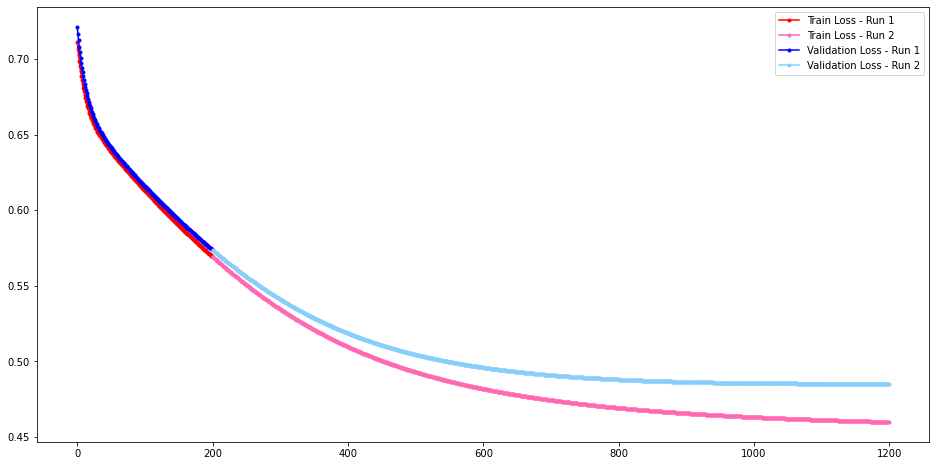

In [39]:
n = len(run_hist_1.history["loss"])
m = len(run_hist_1b.history['loss'])
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(range(n), run_hist_1.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")

ax.plot(range(n), run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["val_loss"], 'LightSkyBlue', marker='.',  label="Validation Loss - Run 2")

ax.legend()

- Build a model with two hidden layers, each with 6 nodes
- Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
- Use a learning rate of .003 and train for 1500 epochs
- Graph the trajectory of the loss functions, accuracy on both train and test set
- Plot the roc curve for the predictions

In [41]:
model_2=Sequential()
model_2.add(Dense(6, input_shape=(8,), activation='relu'))
model_2.add(Dense(6, input_shape=(6,), activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [42]:
model_2.compile(SGD(lr=.003), "binary_crossentropy", 
                 metrics=["accuracy"])
run_hist_2=model_2.fit(X_train_norm, y_train, 
                       validation_data=(X_test_norm, y_test),
                      epochs=1500)

Epoch 1/1500
18/18 [==============================] - 0s 9ms/step - loss: 0.8834 - accuracy: 0.3403 - val_loss: 0.8353 - val_accuracy: 0.3177
Epoch 2/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.8586 - accuracy: 0.3472 - val_loss: 0.8138 - val_accuracy: 0.3281
Epoch 3/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.8368 - accuracy: 0.3542 - val_loss: 0.7949 - val_accuracy: 0.3490
Epoch 4/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.8175 - accuracy: 0.3681 - val_loss: 0.7782 - val_accuracy: 0.3594
Epoch 5/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.8002 - accuracy: 0.3698 - val_loss: 0.7635 - val_accuracy: 0.3698
Epoch 6/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.7849 - accuracy: 0.3837 - val_loss: 0.7504 - val_accuracy: 0.3906
Epoch 7/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.7710 - accuracy: 0.3941 - val_loss: 0.7387 - val_accuracy: 0.4167
Epoch 

18/18 [==============================] - 0s 1ms/step - loss: 0.6015 - accuracy: 0.6580 - val_loss: 0.6163 - val_accuracy: 0.6562
Epoch 59/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.6006 - accuracy: 0.6580 - val_loss: 0.6158 - val_accuracy: 0.6562
Epoch 60/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5997 - accuracy: 0.6597 - val_loss: 0.6152 - val_accuracy: 0.6562
Epoch 61/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5987 - accuracy: 0.6597 - val_loss: 0.6147 - val_accuracy: 0.6562
Epoch 62/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5978 - accuracy: 0.6597 - val_loss: 0.6142 - val_accuracy: 0.6562
Epoch 63/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5969 - accuracy: 0.6615 - val_loss: 0.6136 - val_accuracy: 0.6562
Epoch 64/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5960 - accuracy: 0.6615 - val_loss: 0.6131 - val_accuracy: 0.6562
Epoch 65/1500

18/18 [==============================] - 0s 1ms/step - loss: 0.5584 - accuracy: 0.6684 - val_loss: 0.5904 - val_accuracy: 0.6771
Epoch 116/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5578 - accuracy: 0.6667 - val_loss: 0.5900 - val_accuracy: 0.6771
Epoch 117/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5572 - accuracy: 0.6684 - val_loss: 0.5897 - val_accuracy: 0.6771
Epoch 118/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5567 - accuracy: 0.6719 - val_loss: 0.5893 - val_accuracy: 0.6771
Epoch 119/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5561 - accuracy: 0.6719 - val_loss: 0.5890 - val_accuracy: 0.6719
Epoch 120/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5556 - accuracy: 0.6719 - val_loss: 0.5886 - val_accuracy: 0.6719
Epoch 121/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5551 - accuracy: 0.6736 - val_loss: 0.5883 - val_accuracy: 0.6719
Epoch 1

Epoch 172/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5304 - accuracy: 0.6979 - val_loss: 0.5744 - val_accuracy: 0.6927
Epoch 173/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5300 - accuracy: 0.6979 - val_loss: 0.5742 - val_accuracy: 0.6927
Epoch 174/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5296 - accuracy: 0.6979 - val_loss: 0.5740 - val_accuracy: 0.6927
Epoch 175/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5292 - accuracy: 0.6962 - val_loss: 0.5738 - val_accuracy: 0.6927
Epoch 176/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5287 - accuracy: 0.6944 - val_loss: 0.5736 - val_accuracy: 0.6927
Epoch 177/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5283 - accuracy: 0.6944 - val_loss: 0.5734 - val_accuracy: 0.6979
Epoch 178/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5279 - accuracy: 0.6962 - val_loss: 0.5732 - val_accuracy:

Epoch 229/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5108 - accuracy: 0.7170 - val_loss: 0.5641 - val_accuracy: 0.7031
Epoch 230/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5106 - accuracy: 0.7188 - val_loss: 0.5640 - val_accuracy: 0.7031
Epoch 231/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5103 - accuracy: 0.7153 - val_loss: 0.5638 - val_accuracy: 0.7031
Epoch 232/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5100 - accuracy: 0.7170 - val_loss: 0.5636 - val_accuracy: 0.7031
Epoch 233/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5098 - accuracy: 0.7170 - val_loss: 0.5634 - val_accuracy: 0.7031
Epoch 234/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5095 - accuracy: 0.7153 - val_loss: 0.5633 - val_accuracy: 0.7031
Epoch 235/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.7170 - val_loss: 0.5631 - val_accuracy:

Epoch 286/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 0.7465 - val_loss: 0.5566 - val_accuracy: 0.7240
Epoch 287/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4967 - accuracy: 0.7465 - val_loss: 0.5565 - val_accuracy: 0.7240
Epoch 288/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4965 - accuracy: 0.7465 - val_loss: 0.5564 - val_accuracy: 0.7240
Epoch 289/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4962 - accuracy: 0.7465 - val_loss: 0.5563 - val_accuracy: 0.7240
Epoch 290/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4960 - accuracy: 0.7465 - val_loss: 0.5561 - val_accuracy: 0.7240
Epoch 291/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4958 - accuracy: 0.7465 - val_loss: 0.5560 - val_accuracy: 0.7240
Epoch 292/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4956 - accuracy: 0.7465 - val_loss: 0.5559 - val_accuracy:

Epoch 343/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.7604 - val_loss: 0.5500 - val_accuracy: 0.7188
Epoch 344/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4853 - accuracy: 0.7604 - val_loss: 0.5499 - val_accuracy: 0.7188
Epoch 345/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4851 - accuracy: 0.7622 - val_loss: 0.5499 - val_accuracy: 0.7188
Epoch 346/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4849 - accuracy: 0.7587 - val_loss: 0.5498 - val_accuracy: 0.7188
Epoch 347/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.7604 - val_loss: 0.5497 - val_accuracy: 0.7188
Epoch 348/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4846 - accuracy: 0.7587 - val_loss: 0.5496 - val_accuracy: 0.7188
Epoch 349/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.7604 - val_loss: 0.5496 - val_accuracy:

Epoch 400/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4760 - accuracy: 0.7708 - val_loss: 0.5453 - val_accuracy: 0.7240
Epoch 401/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4758 - accuracy: 0.7674 - val_loss: 0.5452 - val_accuracy: 0.7240
Epoch 402/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.7674 - val_loss: 0.5451 - val_accuracy: 0.7240
Epoch 403/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.7708 - val_loss: 0.5451 - val_accuracy: 0.7240
Epoch 404/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4754 - accuracy: 0.7708 - val_loss: 0.5450 - val_accuracy: 0.7240
Epoch 405/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7691 - val_loss: 0.5449 - val_accuracy: 0.7240
Epoch 406/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.7691 - val_loss: 0.5449 - val_accuracy:

Epoch 457/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4695 - accuracy: 0.7726 - val_loss: 0.5416 - val_accuracy: 0.7188
Epoch 458/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4694 - accuracy: 0.7726 - val_loss: 0.5416 - val_accuracy: 0.7188
Epoch 459/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.7708 - val_loss: 0.5415 - val_accuracy: 0.7188
Epoch 460/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.7726 - val_loss: 0.5415 - val_accuracy: 0.7188
Epoch 461/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4691 - accuracy: 0.7726 - val_loss: 0.5415 - val_accuracy: 0.7188
Epoch 462/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4690 - accuracy: 0.7726 - val_loss: 0.5414 - val_accuracy: 0.7188
Epoch 463/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4689 - accuracy: 0.7726 - val_loss: 0.5414 - val_accuracy:

Epoch 514/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4648 - accuracy: 0.7760 - val_loss: 0.5391 - val_accuracy: 0.7240
Epoch 515/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4648 - accuracy: 0.7760 - val_loss: 0.5391 - val_accuracy: 0.7240
Epoch 516/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.7760 - val_loss: 0.5391 - val_accuracy: 0.7240
Epoch 517/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4646 - accuracy: 0.7760 - val_loss: 0.5390 - val_accuracy: 0.7240
Epoch 518/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4645 - accuracy: 0.7760 - val_loss: 0.5390 - val_accuracy: 0.7240
Epoch 519/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.7760 - val_loss: 0.5389 - val_accuracy: 0.7240
Epoch 520/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.7760 - val_loss: 0.5389 - val_accuracy:

Epoch 571/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4609 - accuracy: 0.7760 - val_loss: 0.5384 - val_accuracy: 0.7135
Epoch 572/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.7778 - val_loss: 0.5384 - val_accuracy: 0.7135
Epoch 573/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.7778 - val_loss: 0.5384 - val_accuracy: 0.7135
Epoch 574/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.7778 - val_loss: 0.5384 - val_accuracy: 0.7135
Epoch 575/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.7778 - val_loss: 0.5384 - val_accuracy: 0.7135
Epoch 576/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.7778 - val_loss: 0.5384 - val_accuracy: 0.7135
Epoch 577/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.7743 - val_loss: 0.5384 - val_accuracy:

Epoch 628/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4574 - accuracy: 0.7760 - val_loss: 0.5388 - val_accuracy: 0.7135
Epoch 629/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4573 - accuracy: 0.7760 - val_loss: 0.5388 - val_accuracy: 0.7135
Epoch 630/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4572 - accuracy: 0.7743 - val_loss: 0.5388 - val_accuracy: 0.7135
Epoch 631/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4572 - accuracy: 0.7726 - val_loss: 0.5387 - val_accuracy: 0.7135
Epoch 632/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4571 - accuracy: 0.7708 - val_loss: 0.5387 - val_accuracy: 0.7083
Epoch 633/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4571 - accuracy: 0.7708 - val_loss: 0.5387 - val_accuracy: 0.7083
Epoch 634/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.7726 - val_loss: 0.5387 - val_accuracy:

Epoch 685/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4544 - accuracy: 0.7743 - val_loss: 0.5385 - val_accuracy: 0.7188
Epoch 686/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4543 - accuracy: 0.7778 - val_loss: 0.5384 - val_accuracy: 0.7188
Epoch 687/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4543 - accuracy: 0.7760 - val_loss: 0.5384 - val_accuracy: 0.7188
Epoch 688/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4543 - accuracy: 0.7778 - val_loss: 0.5384 - val_accuracy: 0.7188
Epoch 689/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4543 - accuracy: 0.7778 - val_loss: 0.5384 - val_accuracy: 0.7188
Epoch 690/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4542 - accuracy: 0.7778 - val_loss: 0.5384 - val_accuracy: 0.7188
Epoch 691/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4541 - accuracy: 0.7760 - val_loss: 0.5384 - val_accuracy:

Epoch 742/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4521 - accuracy: 0.7778 - val_loss: 0.5381 - val_accuracy: 0.7188
Epoch 743/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4521 - accuracy: 0.7778 - val_loss: 0.5381 - val_accuracy: 0.7188
Epoch 744/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.7778 - val_loss: 0.5381 - val_accuracy: 0.7188
Epoch 745/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.7778 - val_loss: 0.5381 - val_accuracy: 0.7188
Epoch 746/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.7795 - val_loss: 0.5381 - val_accuracy: 0.7188
Epoch 747/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.7778 - val_loss: 0.5381 - val_accuracy: 0.7188
Epoch 748/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.7778 - val_loss: 0.5381 - val_accuracy:

Epoch 799/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.7726 - val_loss: 0.5377 - val_accuracy: 0.7292
Epoch 800/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.7726 - val_loss: 0.5376 - val_accuracy: 0.7292
Epoch 801/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.7726 - val_loss: 0.5376 - val_accuracy: 0.7292
Epoch 802/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.7726 - val_loss: 0.5376 - val_accuracy: 0.7292
Epoch 803/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4490 - accuracy: 0.7726 - val_loss: 0.5376 - val_accuracy: 0.7292
Epoch 804/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4490 - accuracy: 0.7726 - val_loss: 0.5376 - val_accuracy: 0.7292
Epoch 805/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.7726 - val_loss: 0.5376 - val_accuracy:

Epoch 856/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.7743 - val_loss: 0.5373 - val_accuracy: 0.7292
Epoch 857/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.7743 - val_loss: 0.5373 - val_accuracy: 0.7292
Epoch 858/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.7743 - val_loss: 0.5373 - val_accuracy: 0.7292
Epoch 859/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.7743 - val_loss: 0.5372 - val_accuracy: 0.7292
Epoch 860/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.7743 - val_loss: 0.5372 - val_accuracy: 0.7292
Epoch 861/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.7743 - val_loss: 0.5372 - val_accuracy: 0.7292
Epoch 862/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4464 - accuracy: 0.7743 - val_loss: 0.5372 - val_accuracy:

Epoch 913/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.7812 - val_loss: 0.5360 - val_accuracy: 0.7292
Epoch 914/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.7812 - val_loss: 0.5359 - val_accuracy: 0.7292
Epoch 915/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.7812 - val_loss: 0.5359 - val_accuracy: 0.7292
Epoch 916/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.7812 - val_loss: 0.5359 - val_accuracy: 0.7292
Epoch 917/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4446 - accuracy: 0.7812 - val_loss: 0.5359 - val_accuracy: 0.7292
Epoch 918/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4446 - accuracy: 0.7812 - val_loss: 0.5358 - val_accuracy: 0.7292
Epoch 919/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4446 - accuracy: 0.7812 - val_loss: 0.5358 - val_accuracy:

Epoch 970/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.7812 - val_loss: 0.5349 - val_accuracy: 0.7292
Epoch 971/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.7812 - val_loss: 0.5349 - val_accuracy: 0.7292
Epoch 972/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.7812 - val_loss: 0.5349 - val_accuracy: 0.7292
Epoch 973/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.7812 - val_loss: 0.5349 - val_accuracy: 0.7292
Epoch 974/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.7812 - val_loss: 0.5348 - val_accuracy: 0.7292
Epoch 975/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.7812 - val_loss: 0.5348 - val_accuracy: 0.7292
Epoch 976/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.7812 - val_loss: 0.5348 - val_accuracy:

Epoch 1027/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.7812 - val_loss: 0.5342 - val_accuracy: 0.7344
Epoch 1028/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.7812 - val_loss: 0.5342 - val_accuracy: 0.7344
Epoch 1029/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.7812 - val_loss: 0.5342 - val_accuracy: 0.7344
Epoch 1030/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.7812 - val_loss: 0.5342 - val_accuracy: 0.7344
Epoch 1031/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.7812 - val_loss: 0.5342 - val_accuracy: 0.7344
Epoch 1032/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.7812 - val_loss: 0.5341 - val_accuracy: 0.7344
Epoch 1033/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4413 - accuracy: 0.7830 - val_loss: 0.5341 - val_ac

18/18 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.7865 - val_loss: 0.5320 - val_accuracy: 0.7396
Epoch 1084/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.7865 - val_loss: 0.5319 - val_accuracy: 0.7396
Epoch 1085/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.7865 - val_loss: 0.5319 - val_accuracy: 0.7396
Epoch 1086/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.7865 - val_loss: 0.5318 - val_accuracy: 0.7448
Epoch 1087/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.7865 - val_loss: 0.5318 - val_accuracy: 0.7448
Epoch 1088/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.7865 - val_loss: 0.5317 - val_accuracy: 0.7448
Epoch 1089/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.7865 - val_loss: 0.5317 - val_accuracy: 0.7448
E

18/18 [==============================] - 0s 1ms/step - loss: 0.4371 - accuracy: 0.7847 - val_loss: 0.5298 - val_accuracy: 0.7500
Epoch 1140/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4371 - accuracy: 0.7847 - val_loss: 0.5298 - val_accuracy: 0.7500
Epoch 1141/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.7830 - val_loss: 0.5298 - val_accuracy: 0.7500
Epoch 1142/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.7830 - val_loss: 0.5298 - val_accuracy: 0.7500
Epoch 1143/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.7865 - val_loss: 0.5298 - val_accuracy: 0.7500
Epoch 1144/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.7865 - val_loss: 0.5297 - val_accuracy: 0.7500
Epoch 1145/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.7865 - val_loss: 0.5297 - val_accuracy: 0.7500
E

18/18 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.7847 - val_loss: 0.5288 - val_accuracy: 0.7552
Epoch 1196/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.7847 - val_loss: 0.5288 - val_accuracy: 0.7552
Epoch 1197/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.7830 - val_loss: 0.5288 - val_accuracy: 0.7552
Epoch 1198/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.7812 - val_loss: 0.5288 - val_accuracy: 0.7500
Epoch 1199/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.7830 - val_loss: 0.5288 - val_accuracy: 0.7500
Epoch 1200/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.7830 - val_loss: 0.5287 - val_accuracy: 0.7500
Epoch 1201/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.7847 - val_loss: 0.5287 - val_accuracy: 0.7500
E

18/18 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.7847 - val_loss: 0.5282 - val_accuracy: 0.7552
Epoch 1252/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.7847 - val_loss: 0.5282 - val_accuracy: 0.7552
Epoch 1253/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.7847 - val_loss: 0.5282 - val_accuracy: 0.7552
Epoch 1254/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.7847 - val_loss: 0.5282 - val_accuracy: 0.7552
Epoch 1255/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.7865 - val_loss: 0.5282 - val_accuracy: 0.7552
Epoch 1256/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.7847 - val_loss: 0.5282 - val_accuracy: 0.7552
Epoch 1257/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.7847 - val_loss: 0.5282 - val_accuracy: 0.7552
E

18/18 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.7882 - val_loss: 0.5275 - val_accuracy: 0.7448
Epoch 1308/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.7882 - val_loss: 0.5275 - val_accuracy: 0.7448
Epoch 1309/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.7865 - val_loss: 0.5274 - val_accuracy: 0.7448
Epoch 1310/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.7882 - val_loss: 0.5274 - val_accuracy: 0.7448
Epoch 1311/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.7882 - val_loss: 0.5274 - val_accuracy: 0.7448
Epoch 1312/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.7899 - val_loss: 0.5274 - val_accuracy: 0.7448
Epoch 1313/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.7882 - val_loss: 0.5274 - val_accuracy: 0.7448
E

18/18 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.7882 - val_loss: 0.5268 - val_accuracy: 0.7552
Epoch 1364/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.7882 - val_loss: 0.5268 - val_accuracy: 0.7552
Epoch 1365/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.7882 - val_loss: 0.5268 - val_accuracy: 0.7552
Epoch 1366/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.7882 - val_loss: 0.5268 - val_accuracy: 0.7552
Epoch 1367/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.7882 - val_loss: 0.5268 - val_accuracy: 0.7552
Epoch 1368/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.7882 - val_loss: 0.5267 - val_accuracy: 0.7552
Epoch 1369/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.7882 - val_loss: 0.5267 - val_accuracy: 0.7552
E

18/18 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.7882 - val_loss: 0.5265 - val_accuracy: 0.7552
Epoch 1420/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.7882 - val_loss: 0.5265 - val_accuracy: 0.7552
Epoch 1421/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.7882 - val_loss: 0.5265 - val_accuracy: 0.7552
Epoch 1422/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.7882 - val_loss: 0.5265 - val_accuracy: 0.7604
Epoch 1423/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.7882 - val_loss: 0.5265 - val_accuracy: 0.7604
Epoch 1424/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.7882 - val_loss: 0.5265 - val_accuracy: 0.7604
Epoch 1425/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.7882 - val_loss: 0.5264 - val_accuracy: 0.7604
E

18/18 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.7882 - val_loss: 0.5263 - val_accuracy: 0.7604
Epoch 1476/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.7882 - val_loss: 0.5263 - val_accuracy: 0.7604
Epoch 1477/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.7899 - val_loss: 0.5263 - val_accuracy: 0.7604
Epoch 1478/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.7882 - val_loss: 0.5263 - val_accuracy: 0.7604
Epoch 1479/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.7882 - val_loss: 0.5263 - val_accuracy: 0.7604
Epoch 1480/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.7882 - val_loss: 0.5263 - val_accuracy: 0.7604
Epoch 1481/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.4270 - accuracy: 0.7882 - val_loss: 0.5263 - val_accuracy: 0.7604
E

In [43]:
run_hist_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy over iterations')

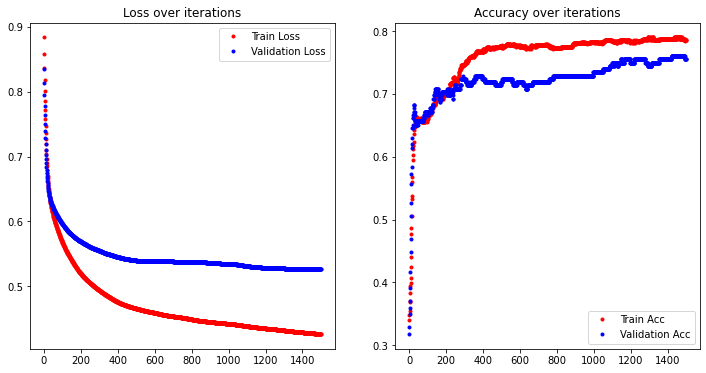

In [44]:
n = len(run_hist_2.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_2.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (run_hist_2.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_2.history["accuracy"]),'r.', label="Train Acc")
ax.plot(range(n), (run_hist_2.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')


accuracy is 0.755
roc-auc is 0.814


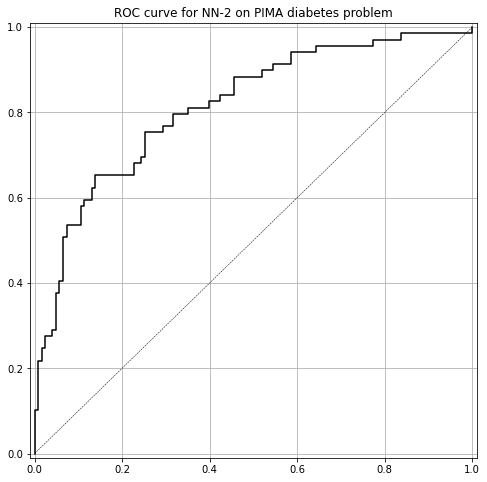

In [45]:
y_pred_class_nn_2 = model_2.predict_classes(X_test_norm)
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
print('')
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN-2')
### END SOLUTION